In [1]:
import os
import os.path
import numpy as np
import scipy as sp
import scipy.fft as fft
from scipy import ndimage
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import matplotlib.colors as colors

In [2]:
#输入数据
path_0='E:/proteinspectrumdeal/M2H'#存放文件目录

In [3]:
#将dat文件转化csv文件
path_1='E:/proteinspectrumdeal/TAcsvdata'

filelist = os.listdir(path_0)#目录下文件列表

    
for files in filelist:
 
    dir_path = os.path.join(path_0, files)
    #分离文件名和文件类型
    file_name = os.path.splitext(files)[0] #文件名
    file_type = os.path.splitext(files)[1]  #文件类型

    #将.dat文件转为.csv文件
    if file_type=='.dat':   #可切换为.xls等
        file_test = open(dir_path,'rb')  #读取原文件
        new_dir = os.path.join(path_1,str(file_name)+'.csv')
        #print(new_dir)
        file_test2 = open(new_dir,'wb')  #创建/修改新文件
        for lines in file_test.readlines():
            lines=lines.decode()
            str_data = ",".join(lines.split(' '))  #分隔符依据自己的文件确定
            file_test2.write(str_data.encode("utf-8"))
        file_test.close()
        file_test2.close()
        
#展示文件      
#for str in filelist:
    #print('%s'% str.ljust(10,"　"))

In [4]:
#文件转化器，读取csv文件，返回rawdata


def load_raw_data(filepath):

    with open(filepath) as f:
        max_rows_to_read = 0
        s = f.readline()
        while True:
            if (s=='') or (s[0]=='f'):
                break
            max_rows_to_read = max_rows_to_read+1
            s = f.readline()
        
    rawdata = np.genfromtxt(filepath, delimiter='\t', max_rows=max_rows_to_read)

    if rawdata.ndim != 2: # This happens if the delimiter is not '\t' (tab) but ',' (comma)
        rawdata = np.genfromtxt(filepath, delimiter=',', max_rows=max_rows_to_read)
    return rawdata

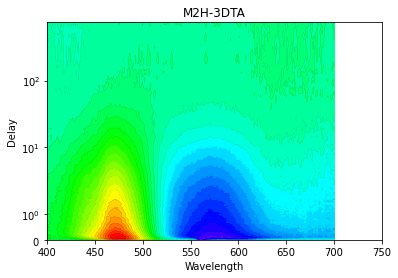

In [5]:
basename0 = os.path.splitext(files)[0]
filepath='E:/proteinspectrumdeal/TAcsvdata/'+basename0+'.csv'
pname = os.path.splitext(os.path.basename(path_0))[0]



rawdata=load_raw_data(filepath)
delay = np.array(rawdata[0,1:], copy=True)
wavelength = np.array(rawdata[1:,0], copy=True)
deltaA = np.array(rawdata[1:,1:], copy=True)







fig = plt.Figure(figsize=(8,6),dpi=100)
#fig.set_tight_layout(True)
# create axes



sparse_step = 1 #通过改变步数设置画图速度
deltaA = np.flipud(deltaA).transpose()
scaledTA = np.tanh(deltaA) 
#应用高斯滤波器
scaledTA=sp.ndimage.gaussian_filter(scaledTA, sigma=1)#Please enter Gaussian sigma (between 0 and 5)
plt.contourf(wavelength[::-sparse_step], delay, scaledTA[::1,::sparse_step],cmap=cm.gist_rainbow_r,levels=40, norm=colors.CenteredNorm())
plt.contour(wavelength[::-sparse_step], delay, scaledTA[::1,::sparse_step], colors='black', levels=40, alpha=0.3, linewidths=0.2)
plt.yscale('symlog', linthresh=1.0, linscale=0.35)
plt.xlim((400,750))
plt.ylim((0,750))
plt.xlabel('Wavelength')
plt.ylabel('Delay')
plt.title(pname+'-3DTA')




basename = os.path.splitext(os.path.basename(filepath))[0] # the basename of the file (no folders, no .csv)
plt.savefig("E:/proteinspectrumdeal/TAcsvdata/TApicture/"+basename+"_3DTA.pdf",bbox_inches='tight',facecolor='w',edgecolor='w')


Text(0.5, 0, 'Single Value Index(n)')

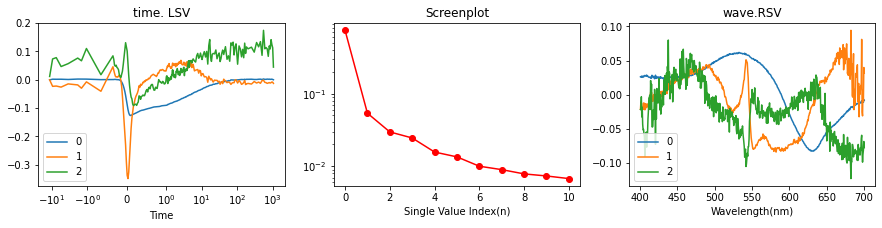

In [6]:
#对矩阵进行SVD分解
l, s, r = np.linalg.svd(deltaA, full_matrices=False)

fig,(ax1, ax2,ax3) = plt.subplots(1, 3,figsize=(15,3))
#ax,fig=plt.figure(2,1)
f=3

for i in range(f):
    ax1.plot(delay,l[:,i],label=i)
    ax1.set_xscale("symlog", linthresh=1)
    ax1.set_xlabel("Time")
    ax1.set_title("time. LSV")
    ax1.legend()
    
  
    
    
    ax3.plot(wavelength,r[i,:],label=i)
    #ax3.set_xscale("symlog", linthresh=1)
    #my_x_ticks=np.linspace(int(wavelength.min()),int(wavelength.max()),num=6)
    #ax3.set_xticks(my_x_ticks)
    ax3.set_xlabel("Wavelength(nm)")
    ax3.set_title("wave.RSV")
    ax3.legend()
    
    
     
n=np.arange(11)
ax2.plot(n,s[:11],"ro-")
ax2.set_yscale("log")
ax2.set_title("Screenplot")
ax2.set_xlabel("Single Value Index(n)")

#plt.title("1")

In [7]:
#把数据变为golotray能用的数据


asciiifilepath = 'E:/proteinspectrumdeal/TAcsvdata/'+basename0+'.ascii'

delay1 = np.array(rawdata[0,1:], copy=True)
delay1.resize((delay1.size,1))
wavelength1 = np.array(rawdata[1:,0], copy=True)
wavelength1.resize((wavelength1.size,1))
delta1 = np.array(rawdata[1:,1:], copy=True)
delta1=np.hstack((wavelength1,delta1))


with open(asciiifilepath , 'w') as f:
    f.write('Npq2_220219_800target3fasea\n')
    f.write('\n')
    f.write( " "+'Time explicit\n')
    f.write(" "+"Intervalnr"    + "          " +str(len(delay1))+"\n")
    np.savetxt(f, delay1,delimiter=' ',fmt='%.15f',newline='\t')
    np.savetxt(f, delta1,delimiter=' ',fmt='%.15f')

In [8]:
delay1.shape

(217, 1)